# Network Science - MDS - UDD 2021

## Taller: Básicos en redes


#### Patricio Ramirez
#### Pablo Elgueta



# Tarea

Juntense en grupos. Tienen una semana para entregar esta tarea. Para ambos datasets `example_1.txt` y `example_2.txt`. Cada grupo deberá cargar el edge list que corresponde y hacer lo siguiente:

* Pregunta 1: Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

* Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

* Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

*Nota: Recuerden que SU interpretación de los resultados es lo más importante.*

# Importando Modulos Requeridos


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# default settings para plotear Redes
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

## 1.- Example 1

In [3]:
# lee una edge list desde el archivo'test.txt'
G = nx.read_edgelist('./example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### 1.1.- Calcula todas las medidas básicas. ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

In [4]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  1000
Número de enlaces:  2991
-------
Grado promedio:  5.982
Grado promedio (alternativa de calculo) 5.982
-------
Grado mínimo:  3
Grado máximo:  98


### Respuesta:

###### - Se aprecia que el Grado Promedio (5.982) se encuentra muy cercano al Grado Mínimo (3) y muy lejano del Grado Máximo, lo cual hace inferir que la mayoría de los nodos poseen una cantidad de enlases inferior al Grado Promedio con una eventual distribución de cola pesada.

###### - Esta condición de una distribución de grado de ley de potencia es propio de una Red de Libre Escala.

### 1.2.- Graficar la distribución del grado. Comente cómo encaja esto con el análisis de la pregunta 1.

###### Gráfica Logarítmica

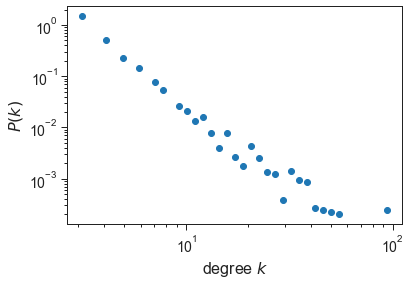

In [5]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=40)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

###### Gráfica Lineal

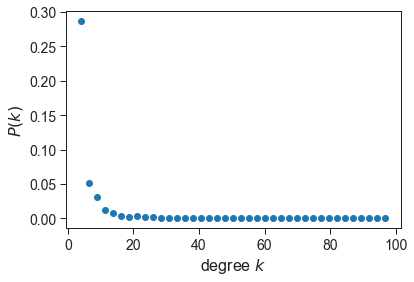

In [6]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=40)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()

In [7]:
print(f'La mayor cantidad de enlaces se encuentra en el bin de primer rango entre {bin_edges[0]} y {bin_edges[1]}  grados')

La mayor cantidad de enlaces se encuentra en el bin de primer rango entre 3.0 y 5.435897435897436  grados


### Respuesta:

###### - Las gráficas confirman que la distribución correspondería a una "distribución de potencia" donde existe mayor probbilidad de nodos que poseen un grado relativamente bajo respecto al rango de valores y una significativa cantidad de nodos con grados muy altos pero de baja probabilidad de grado.

### 1.3.- Dibuje la red. ¿Cómo se reflejan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

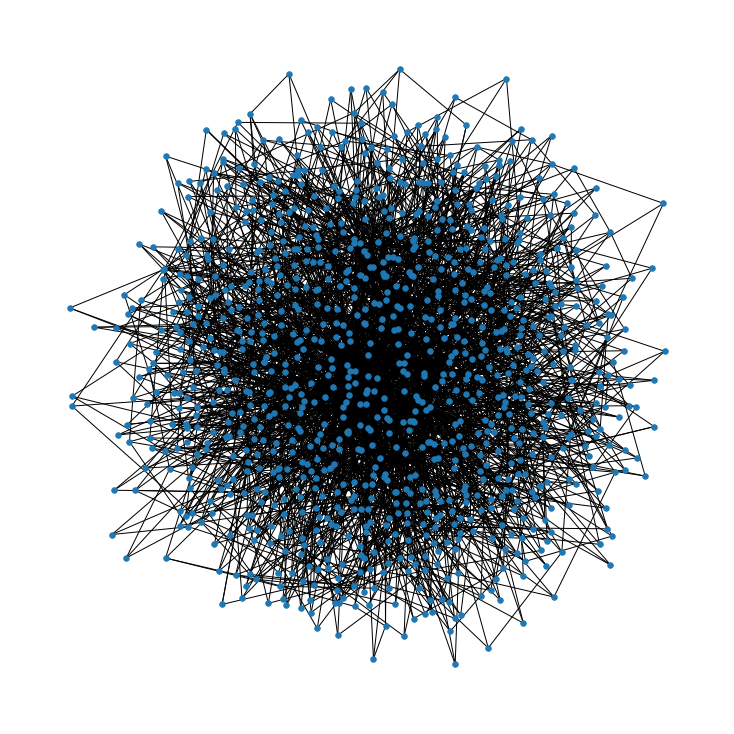

In [8]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(10,10))
nx.draw_spring(G, node_size=30)

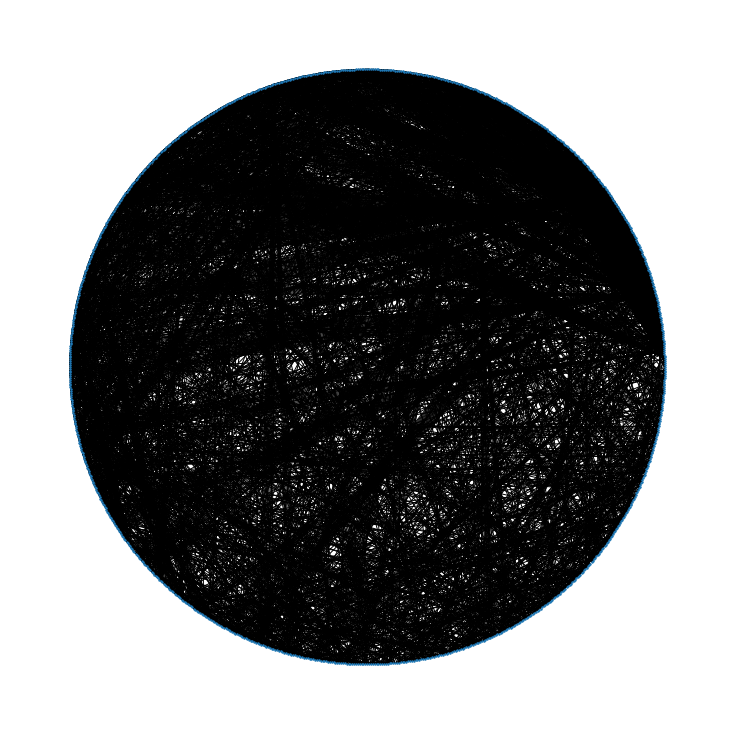

In [9]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(10,10))
nx.draw_circular(G, node_size=2)

### Respuesta:

###### - En primer lugar es posible apreciar que no existen nodos aislados u grupos de nodos, lo cual se debe a que el Grado Mínimo es de 3 enlaces.

###### - Viendo la primera red, no se ve una concentración de nodos que haga suponer una gran cantidad de nodos de grado alto, sino mas bien, los nodos se distribuyen en el gráfico Tambien es posible apreciar que hacia la periferia del grafo los nodos poseen un grado bajo.

###### - Con la segunda red ya se nota que esta bien distribuida y que existen conexiones aleatorias entre todos los nodos, sin marcar claramente un patron. Por lo cual, podemos decir que se trataría una Red de Libre Escala

## 2.- Example 2

In [10]:
# lee una edge list desde el archivo'test.txt'
G = nx.read_edgelist('./example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### 2.1.- Calcula todas las medidas básicas. ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

In [11]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  197
Número de enlaces:  1651
-------
Grado promedio:  16.761421319796955
Grado promedio (alternativa de calculo) 16.761421319796955
-------
Grado mínimo:  1
Grado máximo:  43


### Respuesta:

###### - Esta red tiene una variedad mucho mas de grados para los nodos y las probabilidades de cada grado podrían ser similares. Se aprecia que el Grado Promedio posee un valor cercano a la mitad del rango de Grado Máximo y Grado  Mínimo, característica propia de una Distribución de Poisson.

### 2.2.- Graficar la distribución del grado. Comente cómo encaja esto con el análisis de la pregunta 1.

###### Gráfica Logarítmica

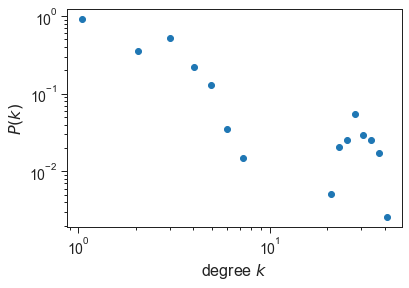

In [12]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=40)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

###### Gráfica Lineal

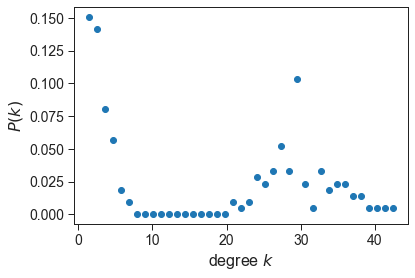

In [13]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=40)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()

### Respuesta:

###### - En el histograma lineal, es posible apreciar que las probabilidades de los grados de los nodos se concentran en dos puntos, uno bajo aproximadamente el Grado = 8 y otro desde aproximadamente el Grado = 24 al Grado = 36.

###### - En el histograma logaritmico, se aprecia con mayor claridad la existencia de 2 intervalos de valores con distribuciones probabilisticas completamente diferentes que se dividen a partir del Grado = 8.

###### - El primer tramo, lo definiremos gráficamente desde el Grado Mínimo = 1 al Grado = 8 , que de acuerdo a  sus histogramas podría calificar clasificarse como una Red de Libre Escala con Distribución de Potencia.


###### - El otro tramo desde apróximadamente el  Grado = 24 al Grado Máximo = 43, que si se analizara en forma aleatoria se podría decir que se comporta como una Red Aleatoria con Distribución de Grado de Poisson .



### 2.3.- Dibuje la red. ¿Cómo se reflejan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

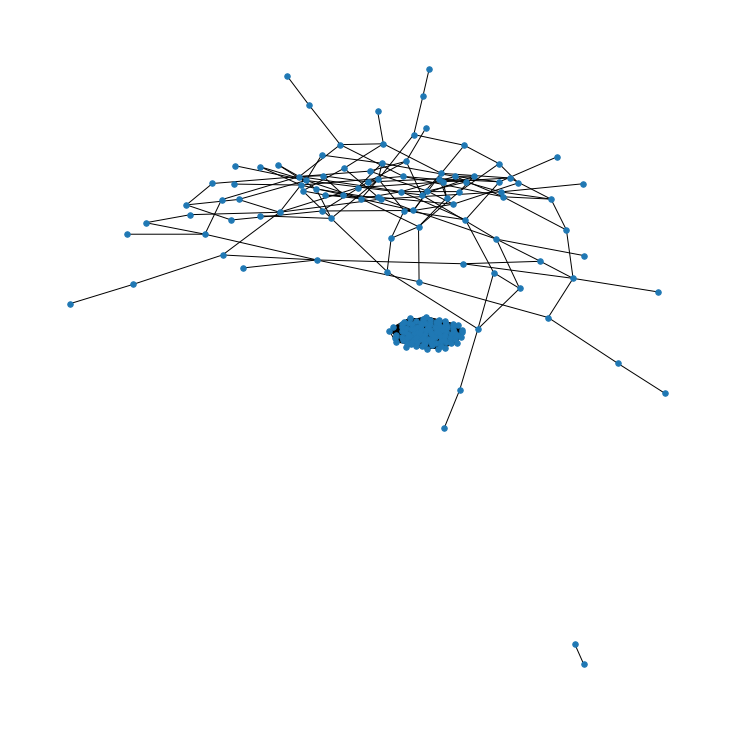

In [14]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(10,10))
nx.draw_spring(G, node_size=30)

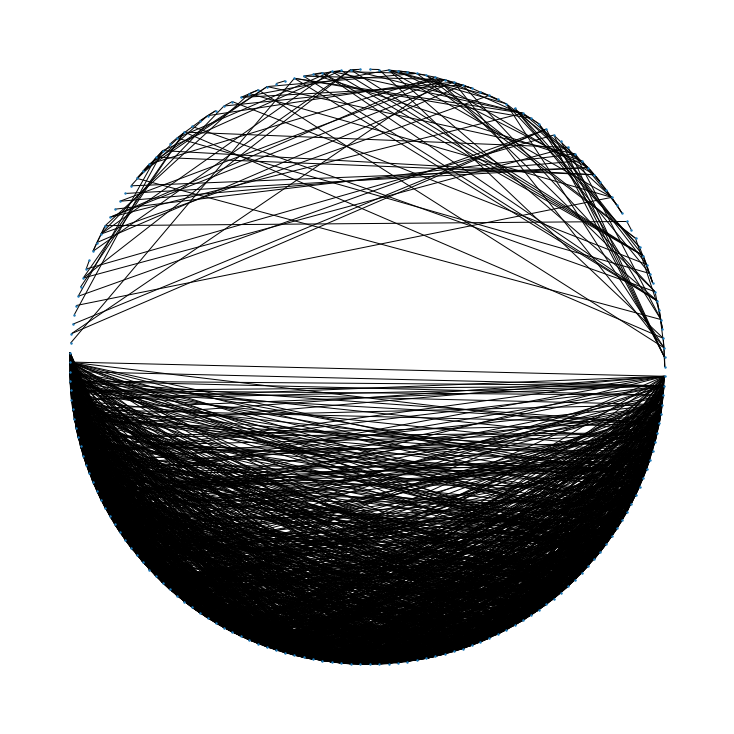

In [15]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(10,10))
nx.draw_circular(G, node_size=2)

### Respuesta:

###### - Con estas dos redes visuales, ya queda claro viendo el primero en donde hay un cumulo de nodos con varias conexiones, mientras que el resto solo tiene una o dos. Esto comprueba la hipotesis del punro anterior de la existencia de 2 subredes con comportamientos de la Distribución de Grados completamente diferentes en independientes.

###### - Ya con la ultima red se ve que la parte de abajo esta llena de enlaces, mientras que la de arriba posee muy pocos.  

###### - También se aprecia para la mitad superior que existen pocos nodos con varios enlaces y estos se encuentran distribuidos.

###### - En conlcusión, la red del segundo ejemplo también trataría de una Red de Libre Escala.